# 目标检测数据集

In [1]:
%matplotlib inline
import os
import pandas as pd
import torch
import torchvision
from d2l import torch as d2l

In [2]:
def read_data_bananas(is_train = True):
    '''

    :param is_train:
    :return:返回所有图片地址和 （类别，左上角x，左上角y，右下角x，右下角y）的向量
    '''
    data_dir = '../data/banana-detection/'
    # csv_fname标签的csv的路径
    # csv_data:
    #     img_name  label  xmin  ymin  xmax  ymax
    # 0      0.png      0   104    20   143    58
    # 1      1.png      0    68   175   118   223
    # 2      2.png      0   163   173   218   239
    # 3      3.png      0    48   157    84   201
    # 4      4.png      0    32    34    90    86
    csv_fname = os.path.join(data_dir,'bananas_train' if is_train else 'bananas_val','label.csv')
    csv_data = pd.read_csv(csv_fname)
    # csv_data:
    #               label  xmin  ymin  xmax  ymax
    # img_name
    # 0.png         0   104    20   143    58
    # 1.png         0    68   175   118   223
    # 2.png         0   163   173   218   239
    # 3.png         0    48   157    84   201
    # 4.png         0    32    34    90    86
    csv_data = csv_data.set_index('img_name')
    images,targets = [],[]
    # img_name是索引(0.png)
    for img_name,target in csv_data.iterrows():
        images.append(torchvision.io.read_image(os.path.join(data_dir, 'bananas_train'
                                                if is_train else 'bananas_val', 'images', f'{img_name}')))
        # 这里的target包含（类别，左上角x，左上角y，右下角x，右下角y），
        # 其中所有图像都具有相同的香蕉类（索引为0）
        targets.append(list(target))
    return images, torch.tensor(targets).unsqueeze(1) / 256

In [3]:
class BananasDataset(torch.utils.data.Dataset):
    def __init__(self,is_train):
        self.features,self.labels = read_data_bananas(is_train)
        print('read'+str(len(self.features))+(f'training examples' if is_train else f'validation examples'))

    def __getitem__(self, idx):
        '''返回第i个样本的数据'''
        return (self.features[idx].float(),self.labels[idx])

    def __len__(self):
        return len(self.features)

In [4]:
def load_data_bananas(batch_size):
    '''
    :param batch_size: 批量大小
    :return:训练集的迭代器，测试集的迭代器
    '''
    train_iter = torch.utils.data.DataLoader(BananasDataset(is_train=True),batch_size,shuffle=True)
    val_iter = torch.utils.data.DataLoader(BananasDataset(is_train=False),batch_size,shuffle=False)

    return train_iter,val_iter

In [5]:
batch_size,edge_size = 32,256
train_iter,_=load_data_bananas(batch_size)
batch = next(iter(train_iter))
# [32, 1, 5]：1：每张图片最多有多少个物体；5：第一个数是类别，后四个数是框
batch[0].shape,batch[1].shape

read1000training examples
read100validation examples


(torch.Size([32, 3, 256, 256]), torch.Size([32, 1, 5]))

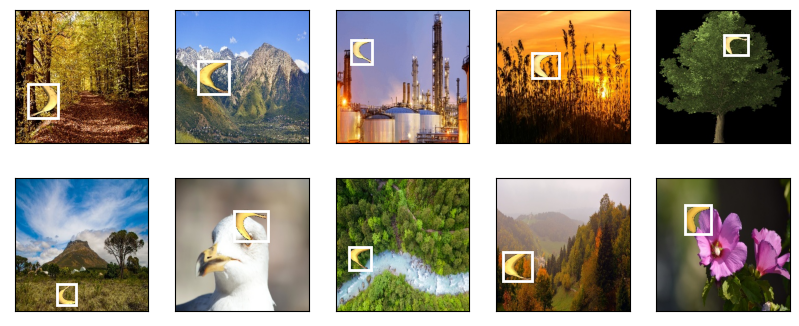

In [6]:
# batch[0]存的是图片，batch[1]存的是label和框
imgs = (batch[0][0:10].permute(0,2,3,1))/255
axes = d2l.show_images(imgs,2,5,scale=2)
for ax,label in zip(axes,batch[1][0:10]):
    d2l.show_bboxes(ax,[label[0][1:5]*edge_size],colors=['w'])